In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import itertools

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv') 
df = pd.DataFrame(data) 
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


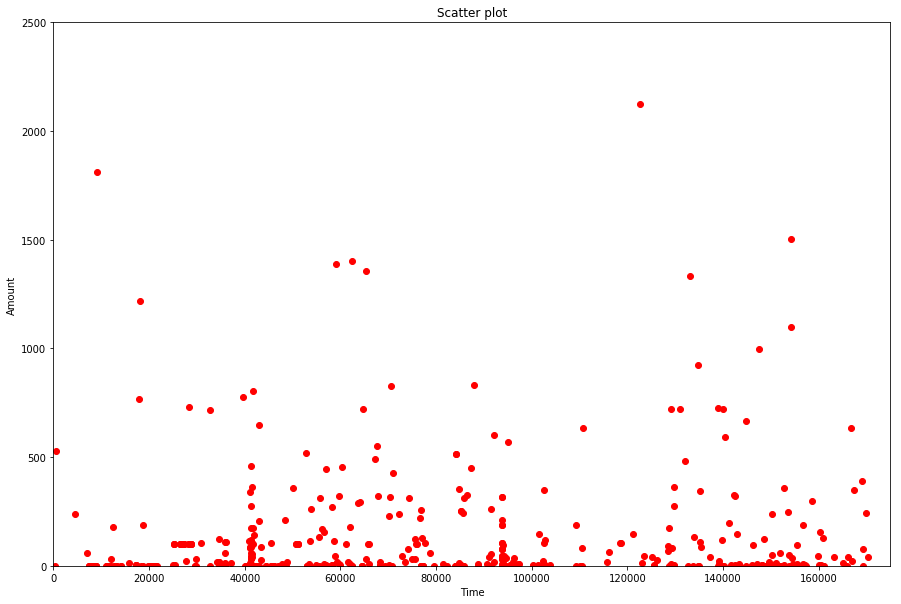

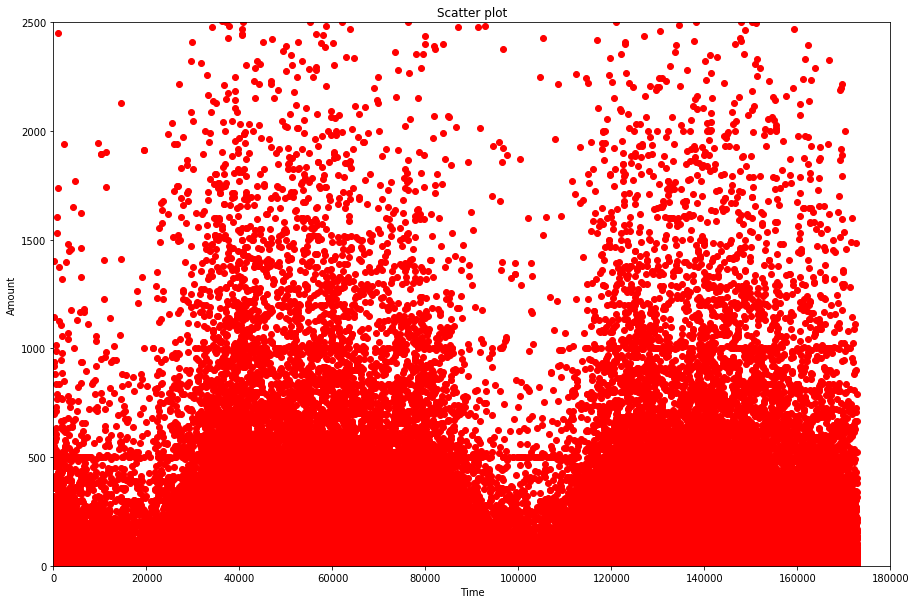

In [3]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'], color='red') # Display fraud amounts according to their time
plt.title('Scatter plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

df_fraud = df[df['Class'] == 0] # Recovery of non-fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'], color='red') # Display fraud amounts according to their time
plt.title('Scatter plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,180000])
plt.ylim([0,2500])
plt.show()

0    284315
1       492
Name: Class, dtype: int64


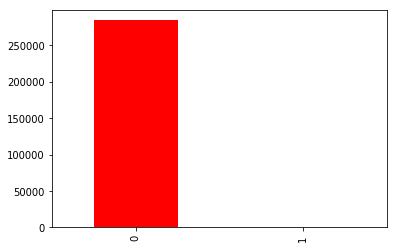

In [4]:
count_Class=pd.value_counts(data["Class"], sort= True)
count_Class.plot(kind= 'bar', color = 'red')
print(count_Class)

In [5]:

No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])
fraud_index= np.array(data[data["Class"]==1].index)
normal_index= data[data["Class"]==0].index
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
#print(random_normal_indices)
random_normal_indices= np.array(random_normal_indices)
#print(random_normal_indices)
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])
undersampled_data= data.iloc[undersampled_indices, :]
#print(undersampled_data.head())

fraudulent transactions( Class 1) :  492
normal transactions( Class 0) :  492
The total number of rows:  984
Class 0 =  50.0
Class 1 =  50.0


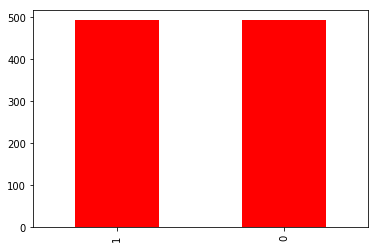

In [6]:
No_of_frauds_sampled= len(undersampled_data[undersampled_data["Class"]== 1])
No_of_normals_sampled = len(undersampled_data[undersampled_data["Class"]== 0])
print("fraudulent transactions( Class 1) : ", No_of_frauds_sampled)
print("normal transactions( Class 0) : ", No_of_normals_sampled)
total_sampled= No_of_frauds_sampled + No_of_normals_sampled
print("The total number of rows: ", total_sampled)
Fraud_percent_sampled= (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled= (No_of_normals_sampled / total_sampled)*100
print("Class 0 = ", Normal_percent_sampled)
print("Class 1 = ", Fraud_percent_sampled)
#Check the data count now
count_sampled=pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar', color = "red")

In [7]:
#We have to scale the Amount feature before fitting our model to our dataset

sc= StandardScaler()
undersampled_data["scaled_Amount"]=  sc.fit_transform(undersampled_data.iloc[:,29].values.reshape(-1,1))

#dropping time and old amount column
undersampled_data= undersampled_data.drop(["Time","Amount"], axis= 1)

print(undersampled_data.head())

            V1        V2        V3        V4        V5        V6        V7  \
541  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
623  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
4920 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
6108 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6329  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   

            V8        V9       V10  ...       V21       V22       V23  \
541   1.391657 -2.770089 -2.772272  ...  0.517232 -0.035049 -0.465211   
623  -0.067794 -0.270953 -0.838587  ...  0.661696  0.435477  1.375966   
4920 -0.399147 -0.238253 -1.525412  ... -0.294166 -0.932391  0.172726   
6108 -0.248778 -0.247768 -4.801637  ...  0.573574  0.176968 -0.436207   
6329 -0.496358 -1.282858 -2.447469  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Class  scaled_Amount  
541   0.32019

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
X= undersampled_data.iloc[:, undersampled_data.columns != "Class"].values

y= undersampled_data.iloc[:, undersampled_data.columns == "Class"].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  738
X_test:  246
y_train:  738
y_test:  246


In [10]:
#Using the gaussian kernel to build the initail model. Let us see if this is the best parameter later
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0, probability=True)
classifier.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=0, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
#Predict the class using X_test
y_pred = classifier.predict(X_test)

The accuracy is 92.6829268292683 %
The recall from the confusion matrix is 92.43697478991596 %


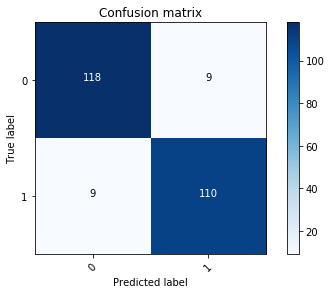

In [12]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print("The accuracy is "+str((cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1]+cm[1,0] + cm[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(cm[1,1]/(cm[1,0] + cm[1,1])*100) +" %")

#cm1 is the confusion matrix 1 which uses the undersampled dataset
cm1 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm1, class_names)

In [13]:
accuracies = cross_val_score(estimator = classifier, X=X_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)
print("The accuracy of our model in % is betweeen {} and {}".format(mean_accuracy-std_accuracy, mean_accuracy+std_accuracy))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

The mean accuracy in %:  91.88515364679746
The standard deviation in %  3.2105733192261883
The accuracy of our model in % is betweeen 88.67458032757128 and 95.09572696602365


In [14]:
#creating a new dataset to test our model
datanew= data.copy()

#Now to test the model with the whole dataset
datanew["scaled_Amount"]=  sc.fit_transform(datanew["Amount"].values.reshape(-1,1))

#dropping time and old amount column
datanew= datanew.drop(["Time","Amount"], axis= 1)

#separating the x and y variables to fit our model
X_full= datanew.iloc[:, undersampled_data.columns != "Class"].values

y_full= datanew.iloc[:, undersampled_data.columns == "Class"].values


In [15]:
#splitting the full dataset into training and test set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size= 0.25, random_state= 0)

print("The split of the full dataset is as follows")
print("X_train_full: ", len(X_train_full))
print("X_test_full: ", len(X_test_full))
print("y_train_full: ", len(y_train_full))
print("y_test_full: ", len(y_test_full))


The split of the full dataset is as follows
X_train_full:  213605
X_test_full:  71202
y_train_full:  213605
y_test_full:  71202


In [16]:
#predicting y_pred_full_dataset
y_pred_full_dataset= classifier.predict(X_test_full)

#confusion matrix usign y_test_full and ypred_full
cm3 = confusion_matrix(y_test_full, y_pred_full_dataset)

The accuracy is 94.92289542428584 %
The recall from the confusion matrix is 93.33333333333333 %


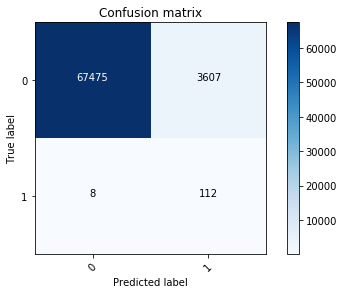

In [17]:
plot_confusion_matrix(cm3, class_names)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test_full, y_pred_full_dataset))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71082
           1       0.03      0.93      0.06       120

    accuracy                           0.95     71202
   macro avg       0.51      0.94      0.52     71202
weighted avg       1.00      0.95      0.97     71202



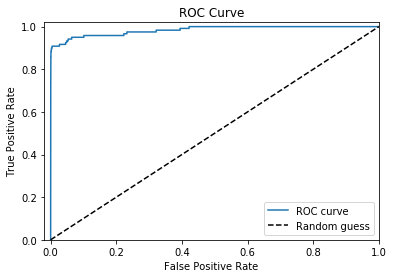

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = classifier.predict_proba(X_test_full)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [20]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_full, y_pred_prob)

0.9835450606341971